In [1]:
# Import packages & setup dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funky import extractor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# names=['ID', 'M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen', 'Z', 'gen_max']
df_gc = extractor('gc')
df_nsc = extractor('nsc')
df_ysc = extractor('ysc')

In [2]:
def classes(gen):
    if gen > 3: return 1
    return gen


df_nsc['target'] = df_nsc['gen_max'].transform(classes)

In [3]:
min_evo = df_nsc.loc[df_nsc.groupby('ID')['gen'].idxmin()]

In [4]:
# separate test set, create label set
dumped_features = ['ID', 'gen', 'gen_max', 'target']
nsc_train, nsc_test, fate_train, fate_test = train_test_split((train_feats := min_evo.drop(columns=dumped_features)), min_evo['target'], test_size=0.2)


forest = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=1758, n_jobs=-1, class_weight='balanced')
forest.fit(nsc_train, fate_train)
print(classification_report(fate_test, forest.predict(nsc_test)))

              precision    recall  f1-score   support

           1       0.26      0.26      0.26      4327
           2       1.00      0.99      1.00    479924
           3       0.84      0.91      0.87     31695

    accuracy                           0.98    515946
   macro avg       0.70      0.72      0.71    515946
weighted avg       0.98      0.98      0.98    515946



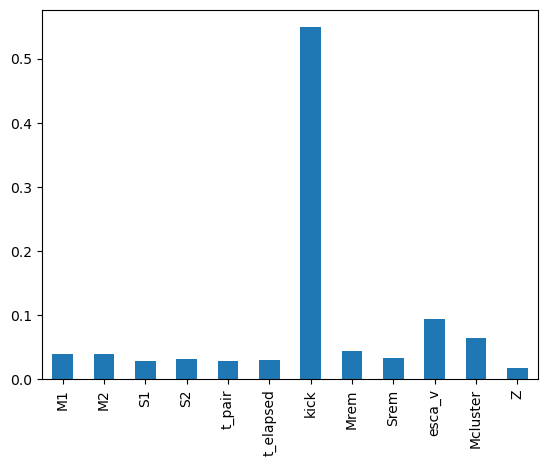

In [5]:
importances = pd.Series(forest.feature_importances_, index=list(train_feats))
importances.plot.bar()
plt.show()